# Multi-Connection Support in Mesh Networks
## Complexity Science, Fall 2017
### Kaitlyn Keil and Lucy Wilcox

This notebook belongs with the report found [here](https://github.com/LucyWilcox/ParticipatoryGreedyRouting/blob/master/reports/final_report.md). It was done as a final project for Olin College's Complexity Science course.

In [1]:
from __future__ import print_function, division

%matplotlib inline
%precision 3

import warnings
warnings.filterwarnings('ignore')

import copy
import numpy as np
import Routers, CityViewer
import RouterGraphs as rg

import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objs as go

We examine two models of mesh network. In the traditional version, each new router only connects to one other router with access to wifi and directs its traffic solely through this source. In the multi-connect model, each new router attempts to connect to as many routers with access as possible, and splits its traffic evenly between them.

In [2]:
def graph_routers(data):
    """ Plots the number of disconnected and connected routers for each step. """
    for k, v in data.items():
        v_0 = v[0]
        v_1 = v[1]
        v_2 = v[2]
        
        x_axis = range(len(v_0))
        conn_r = plt.plot(x_axis, v_1, 'o-', color='r', label="all connected routers")
        disconn_r = plt.plot(x_axis, v_2, 'o-', color='b', label='all disconneced routers')
        plt.ylabel("Num Routers")
        plt.xlabel("Steps")
        title = "Connected and Disconnected Routers per Step, " + k + " Model"
        plt.title(title)
        plt.legend(loc='upper left')
        plt.show()

In [3]:
# Set up two identical cities, in which one connects in the
#  traditional fashion and the other connects to all available
#  wifi sources.

example_city_traditional = Routers.City(100, num_routers = 15)
example_city_multi = copy.deepcopy(example_city_traditional)
example_city_multi.multi_connect = True

In [4]:
# Prepare lists and dictionaries for later plotting

num_routers_trad = []
num_connected_trad = []
num_disconnected_trad = []

num_routers_multi = []
num_connected_multi = []
num_disconnected_multi = []

trad_multi = {}

In [5]:
# Run each city for 125 steps
for _ in range(125):
    example_city_traditional.step()
    example_city_multi.step()
    num_routers_trad.append(len(example_city_traditional.occupied))
    num_connected_trad.append(len(example_city_traditional.has_wifi_routers))
    num_disconnected_trad.append(len(example_city_traditional.no_wifi_routers))
    
    num_routers_multi.append(len(example_city_multi.occupied))
    num_connected_multi.append(len(example_city_multi.has_wifi_routers))
    num_disconnected_multi.append(len(example_city_multi.no_wifi_routers))

In [6]:
# Set up viewers to visually look at the cities

viewer_trad = CityViewer.CityViewer(example_city_traditional)
viewer_multi = CityViewer.CityViewer(example_city_multi)

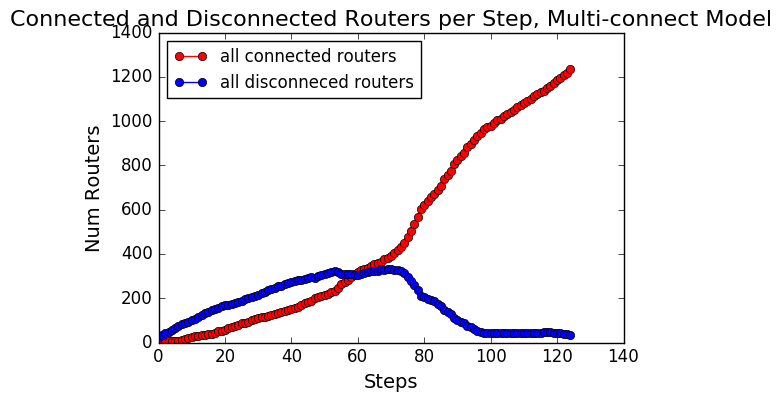

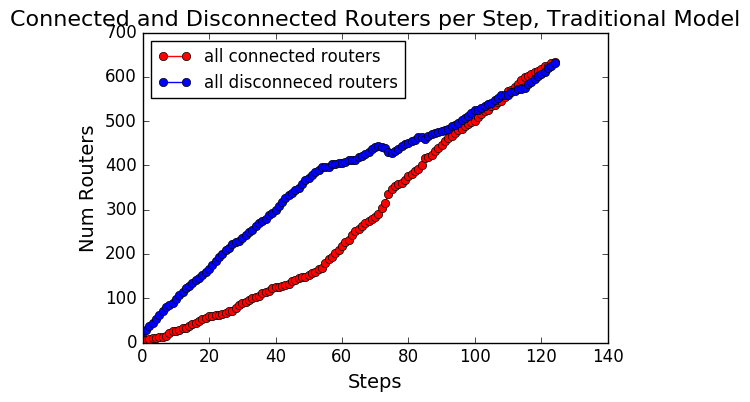

In [7]:
# plot the results to compare connected and disconnected
#  Notice the large Y-scale difference.

trad_multi['Traditional'] = (num_routers_trad, num_connected_trad, num_disconnected_trad)
trad_multi['Multi-connect'] = (num_routers_multi, num_connected_multi, num_disconnected_multi)
graph_routers(trad_multi)

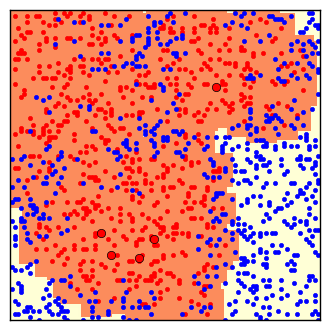

In [8]:
# visually look at the results
#  The traditional model leaves a large area unserved
viewer_trad.draw()

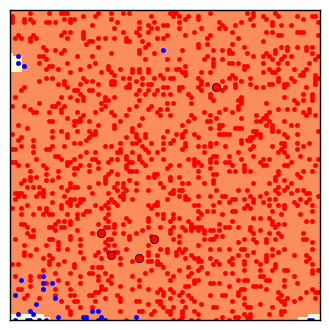

In [9]:
# The multi-connect model gets nearly everywhere, even if there are scattered, unconnected pieces.
viewer_multi.draw()

In [10]:
def latency_calcs(city):
    """ Compute the basic statistical attributes of the model: mean, STD, and Median. """
    latency_array = np.array([node.latency for node in city.has_wifi_routers])
    ave = np.mean(latency_array)
    std = np.std(latency_array)
    med = np.median(latency_array)
    print("\tAverage:", ave)
    print("\tSTD    :", std)
    print("\tMedian :", med)
    return ave, std, med

def calc_ave_latency(city):
    """ Given a city, calculates the average latency
    of all connected routers. """
    num_routers = len(city.has_wifi_routers)
    L_sum = 0
    for router in city.has_wifi_routers:
        L_sum += router.latency
    
    return L_sum/num_routers

In [11]:
# Compare the actual latency values

print("Traditional Model")
t_ave, t_std, t_median = latency_calcs(example_city_traditional)
print("Multi-Connect Model")
m_ave, m_std, m_median = latency_calcs(example_city_multi)

Traditional Model
	Average: 6.24960505529
	STD    : 4.14442323126
	Median : 5.0
Multi-Connect Model
	Average: 4.97219006193
	STD    : 3.50314407952
	Median : 3.65356201675


We see based on this first run that the mean latency is lower. Before we can accept this, however, we should look at a few more examples.

In [12]:
# Repeat the simulation a few more times

cities_trad = []
cities_multi = []
for i in range(3):
    city1 = Routers.City(100, num_routers = 15)
    cities_trad.append(city1)
    city2 = copy.deepcopy(city1)
    city2.multi_connect = True
    cities_multi.append(city2)
    
num_routers_trad = []
num_connected_trad = []
num_disconnected_trad = []

num_routers_multi = []
num_connected_multi = []
num_disconnected_multi = []

connect_options = {}


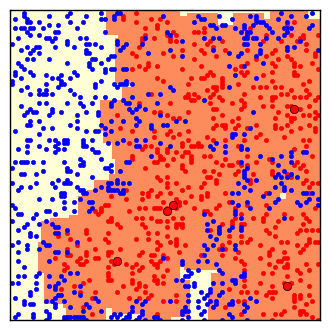

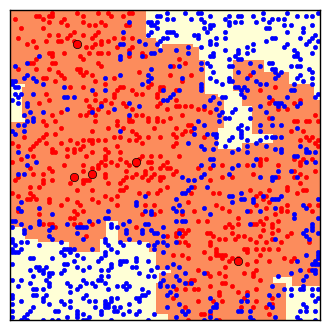

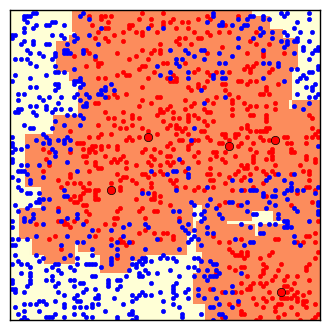

In [13]:
for city in cities_trad:
    num_routers_trad.append([])
    num_connected_trad.append([])
    num_disconnected_trad.append([])

    for _ in range(125): #steps
        city.step()
        num_routers_trad[-1].append(len(city.occupied))
        num_connected_trad[-1].append(len(city.has_wifi_routers))
        num_disconnected_trad[-1].append(len(city.no_wifi_routers))
                
    viewer = CityViewer.CityViewer(city)
    viewer.draw()
    connect_options["Traditional"] = (num_routers_trad, num_connected_trad, num_disconnected_trad)

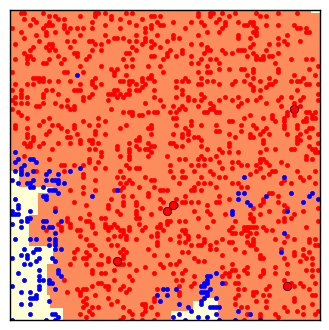

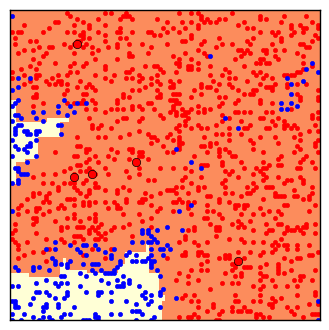

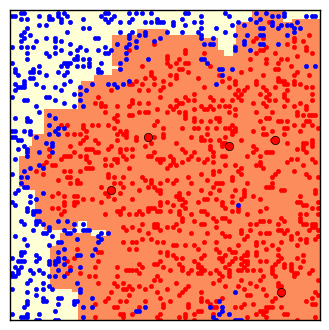

In [14]:
for city in cities_multi:
    num_routers_multi.append([])
    num_connected_multi.append([])
    num_disconnected_multi.append([])

    for _ in range(125): #steps
        city.step()
        num_routers_multi[-1].append(len(city.occupied))
        num_connected_multi[-1].append(len(city.has_wifi_routers))
        num_disconnected_multi[-1].append(len(city.no_wifi_routers))
                
    viewer = CityViewer.CityViewer(city)
    viewer.draw()
    connect_options["Multi-Connect"] = (num_routers_multi, num_connected_multi, num_disconnected_multi)

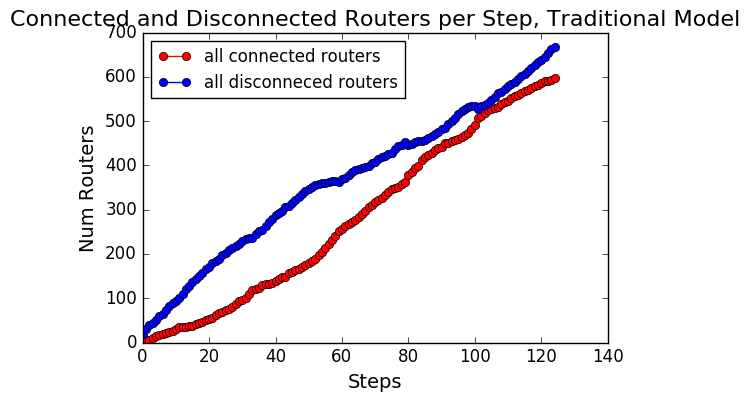

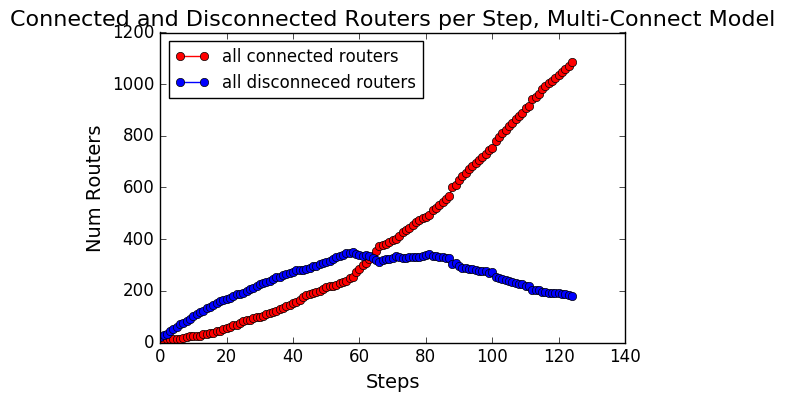

Traditional Model
	Average: 6.52842809365
	STD    : 3.75882834214
	Median : 6.0
Multi-Connect Model
	Average: 6.88840569161
	STD    : 4.32729665723
	Median : 6.0


In [16]:
temp_connect_first = {}
temp_connect_first["Traditional"] = (connect_options["Traditional"][0][0], connect_options["Traditional"][1][0],connect_options["Traditional"][2][0])
temp_connect_first["Multi-Connect"] = (connect_options["Multi-Connect"][0][0], connect_options["Multi-Connect"][1][0],connect_options["Multi-Connect"][2][0])
graph_routers(temp_connect_first)
print("Traditional Model")
t_ave, t_std, t_median = latency_calcs(cities_trad[0])
print("Multi-Connect Model")
m_ave, m_std, m_median = latency_calcs(cities_multi[0])

Here, it appears that our multi-connect model is suffering in terms of latency, but still allows more routers to hook up. This might be because each router does not necessarily scale latency linearly as it connects, so when we have more routers connected, such as in the multi-connect model, the latency everywhere is necessarily higher.

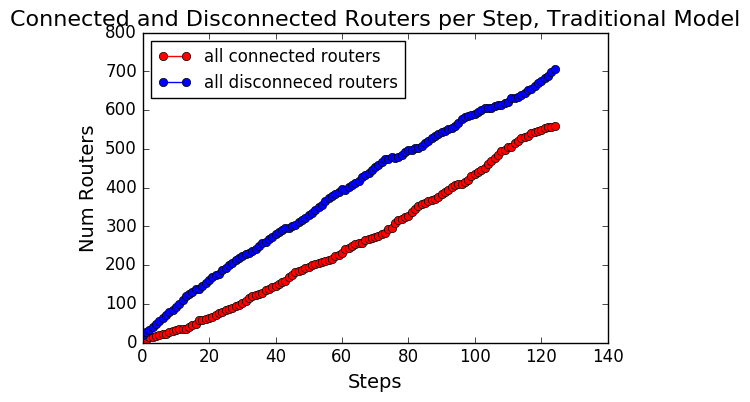

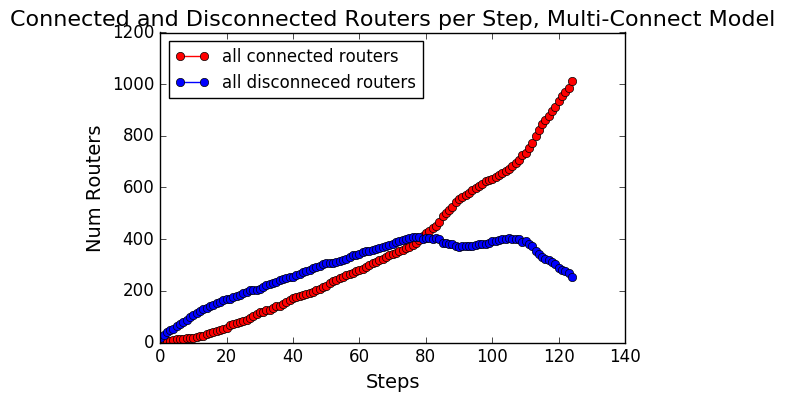

Traditional Model
	Average: 6.45698924731
	STD    : 3.88325781964
	Median : 6.0
Multi-Connect Model
	Average: 7.30485940544
	STD    : 4.22353948802
	Median : 6.56095679012


In [18]:
temp_connect_second = {}
temp_connect_second["Traditional"] = (connect_options["Traditional"][0][1], connect_options["Traditional"][1][1],connect_options["Traditional"][2][1])
temp_connect_second["Multi-Connect"] = (connect_options["Multi-Connect"][0][1], connect_options["Multi-Connect"][1][1],connect_options["Multi-Connect"][2][1])
graph_routers(temp_connect_second)
print("Traditional Model")
t_ave, t_std, t_median = latency_calcs(cities_trad[1])
print("Multi-Connect Model")
m_ave, m_std, m_median = latency_calcs(cities_multi[1])

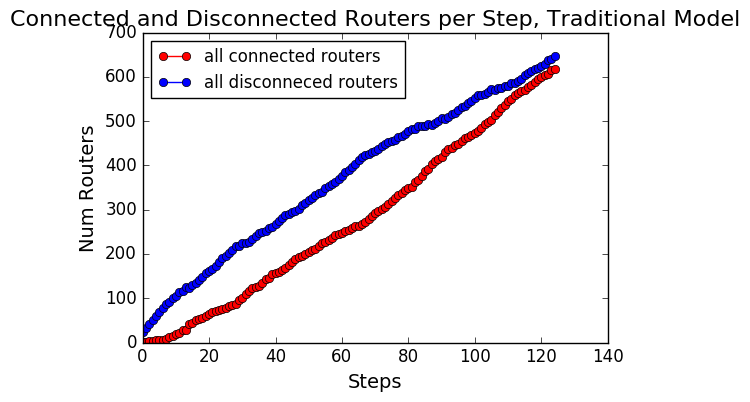

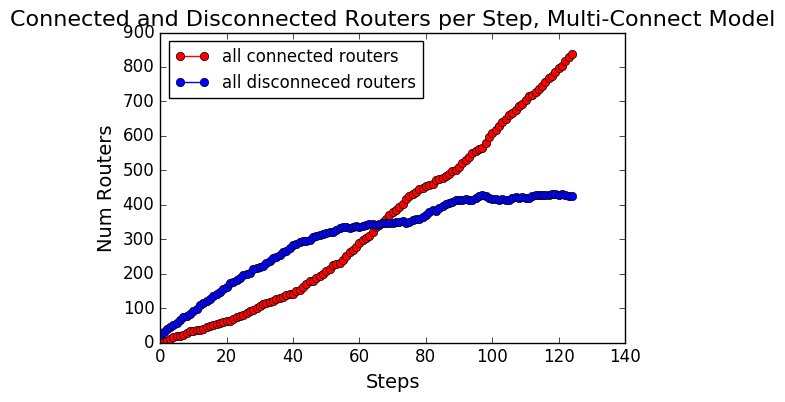

Traditional Model
	Average: 6.24757281553
	STD    : 4.00507795787
	Median : 5.0
Multi-Connect Model
	Average: 7.80660933252
	STD    : 3.35818339562
	Median : 7.0


In [19]:
temp_connect_third = {}
temp_connect_third["Traditional"] = (connect_options["Traditional"][0][2], connect_options["Traditional"][1][2],connect_options["Traditional"][2][2])
temp_connect_third["Multi-Connect"] = (connect_options["Multi-Connect"][0][2], connect_options["Multi-Connect"][1][2],connect_options["Multi-Connect"][2][2])
graph_routers(temp_connect_third)
print("Traditional Model")
t_ave, t_std, t_median = latency_calcs(cities_trad[2])
print("Multi-Connect Model")
m_ave, m_std, m_median = latency_calcs(cities_multi[2])


The additional experiments resulted in generally lower latency for the multi-connect model. The first experiment may be a fluke, or it may not matter as much what the base latency is. Interestingly, the multi-connect models appear to have a significantly higher STD, opposite of what we proposed before. The lower median, however, suggests that it is skewed low with a few very high nodes.